# 1. Descripción del problema (Optimización de árbol binario de búsqueda)

Entrada: Secuencia ordenada de n claves: $K=\left<k_1,k_2,...,k_n\right>$. Cada clave $k_i$ tiene una probabilidad $p_i$ de ser buscada. Existen claves ficticias $d_i$ que representan búsquedas fallidas con $k_{i-1} \leq d_i \leq k_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno, es decir: $\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$.

Salida: Un árbol de búsqueda óptimo, es decir, un árbol que minimice la cantidad esperada de nodos visitados (costo esperado). 

El problema del árbol binario de búsqueda óptimo se refiere a un árbol que proporcione un tiempo de búsqueda más pequeño posible (óptimo) para una secuencia de entrada. Para realizar esto, se utilizan dos tipos de programación, estos siendo dinámica y recursiva. Con este algoritmo entonces buscamos obtener un árbol que minimice la cantidad esperada de nodos a visitar.

# 2. Árbol de búsqueda óptimo

El siguiente código contiene implementaciones del algoritmo de  **búsqueda de árbol óptimo** de manera recursiva y mediante programación dinámica.

## 2.1. Código

In [70]:
import random as rd
from termcolor import colored
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import copy
import datetime
from timeit import repeat
import statistics as st
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

In [71]:
def optimal_bst_instance_generator(n):
    keys = sorted(rd.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q

In [72]:
nullnodes = 0
def generate_binary_tree(T,A):
    global nullnodes
    if len(A)==1: 
      T.add_node(A[0])
      return A[0]
    else:
      pivote = rd.randint(0,len(A)-1)
      T.add_node(A[pivote])

      if pivote > 0:
        left_node = generate_binary_tree(T,A[0:pivote])
        T.add_edge(A[pivote],left_node)
      elif pivote ==0: 
        T.add_edge(A[pivote],"nil"+str(nullnodes)); nullnodes+=1
      
      if pivote < len(A)-1:
        right_node = generate_binary_tree(T,A[pivote+1:])
        T.add_edge(A[pivote],right_node)
      else: 
        T.add_edge(A[pivote],"nil"+str(nullnodes)); nullnodes+=1

      return A[pivote]

Claves: [24, 66, 84]
Probabilidad claves: [0.14496830193339125, 0.03955689873068895, 0.21294460756228575]
Probabilidad claves ficticias: [0.04628947 0.34524094 0.15230242 0.05869735]
Costo mínimo del árbol binario de búsqueda óptimo: 0.6215519076211351
Llamadas recursivas totales: 14


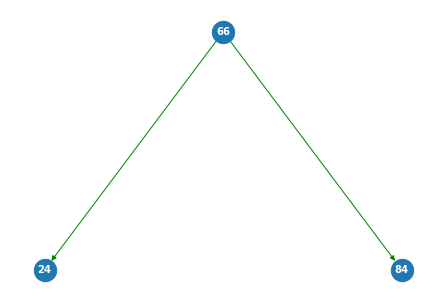

In [73]:
llamadas = 0

def optimalSearchTreeRec(keys, freq, i, j, verbose = False, visualize = False):
  if j < i: 
    if verbose: print(f"No existen elementos en el subarreglo {i}-{j}, retornamos 0.")
    return 0

  if j == i: 
    if verbose: print(f"Solo un elemento en el subarreglo {freq[i:j+1]}: {freq[i]}. Retornamos este elemento.")
    return freq[i]
	
  if verbose: print(f"Arreglo de frecuencias actual: {freq[i:j+1]}")
  suma = 0

  for k in range(i, j + 1): 
    suma += freq[k]

  sumaFrecuencias = suma
  if verbose: print("Suma de frecuencias:", sumaFrecuencias)
  valorMin = mt.inf

  for k in range(i, j + 1):
    global llamadas 
    llamadas += 2
    if verbose: print("------------------------------")
    costo = optimalSearchTreeRec(keys, freq, i, k - 1) + optimalSearchTreeRec(keys, freq, k + 1, j)
    if verbose: print("Costo encontrado en esta llamada:", costo)
    if (costo < valorMin): 
      if verbose: print(f"El costo encontrado es menor que el menor costo previamente almacenado. {costo} < {valorMin}")
      valorMin = costo
      if verbose: print("Tenemos un nuevo menor costo:", valorMin)
  if verbose: print(f"Menor costo esperado final: {valorMin + sumaFrecuencias} (Menor costo: {valorMin}) + (Suma de frecuencias: {sumaFrecuencias})")
  return valorMin + sumaFrecuencias

keys, p, q = optimal_bst_instance_generator(3)

T = nx.DiGraph()
a = generate_binary_tree(T,keys)
pos = graphviz_layout(T, prog="dot")
nx.draw(T,pos, with_labels=True, node_size=500, font_color="white", font_size=10, font_weight="black", width=1.0, edge_color ="green")

n = len(keys)
print("Claves:", keys)
print("Probabilidad claves:", p)
print("Probabilidad claves ficticias:", q)
print("Costo mínimo del árbol binario de búsqueda óptimo:", optimalSearchTreeRec(keys, p, 0, n - 1))
print("Llamadas recursivas totales:", llamadas)

Claves: [23, 27, 53]
Probabilidad claves: [0.0842440584005612, 0.08164113382255475, 0.2364929291234373]
Probabilidad claves ficticias: [0.09324622 0.24348918 0.22948855 0.03139793]
Costo mínimo del árbol binario de búsqueda óptimo: 0.649904447392224
Subproblemas resueltos: 7


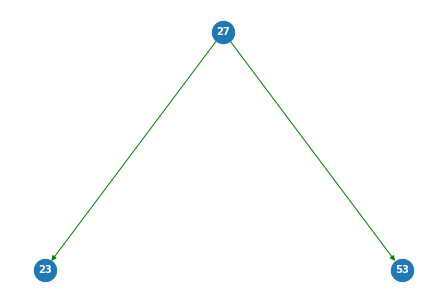

In [74]:
subproblemas = 0
def optimalSearchTreeDin(keys, freq, n, verbose = False, visualize = False):
	cost = [[0 for x in range(n)] for y in range(n)]

	if verbose: print(f"Creamos una matriz cuadrada de tamaño {n}: {cost}")
	for i in range(n):
		cost[i][i] = freq[i]
	if verbose:
		print(f"Luego insertamos las frecuencias en la matriz (en la diagonal principal).")
		print(f"{cost[0]}\n{cost[1]}\n{cost[2]}")
		print("------------------------------")

	for L in range(2, n + 1):
		for i in range(n - L + 1):
			j = i + L - 1
			if verbose: print(f"Fila actual = {i}, Columna actual = {j}")

			suma = 0
			for k in range (i, j + 1): suma += freq[k]
			if verbose: print(f"Calculamos la suma de frecuencias: {suma}")

			if i >= n or j >= n: break

			cost[i][j] = mt.inf

			for r in range(i, j + 1):
				global subproblemas
				subproblemas += 1
				c = 0
				if r > i: c += cost[i][r - 1]
				if r < j: c += cost[r + 1][j]
				c += suma
				if verbose: 
					print(f"El costo cuando {keys[r]} es la raíz es igual a {c}.")
					print(f"Ahora nos fijamos si este es menor al menor costo almacenado, si lo es, lo acualizamos.")
				if c < cost[i][j]:
					if verbose:
						print(f"{c} es el nuevo menor costo encontrado.")
					cost[i][j] = c
				else:
					if verbose: print("El costo encontrado no es menor que el menor costo previamente calculado.")
	return cost[0][n - 1]

keys, p, q = optimal_bst_instance_generator(3)

T = nx.DiGraph()
a = generate_binary_tree(T,keys)
pos = graphviz_layout(T, prog="dot")
nx.draw(T,pos, with_labels=True, node_size=500, font_color="white", font_size=10, font_weight="black", width=1.0, edge_color ="green")

n = len(keys)
print("Claves:", keys)
print("Probabilidad claves:", p)
print("Probabilidad claves ficticias:", q)
print("Costo mínimo del árbol binario de búsqueda óptimo:", optimalSearchTreeDin(keys, p, n))
print("Subproblemas resueltos:", subproblemas)

## 2.2. Descripción del algoritmo

El árbol binario de búsqueda óptimo hace lo siguiente para funcionar:

1. Crea una matriz auxiliar para guardar los valores

2. Realiza una comparación entre nodos, si hay un nodo con coste igual a la frecuencia del nodo o más de uno con este parámetro, calculando su coste respectivo.

3. Guardamos los valores iterativamente en la matriz.

Las implementaciones recursiva y dinámica tienen diferencias:

### 2.2.1 Algoritmo Recursivo
En esta implementación, el árbol solo puede ser modificado después de ser creado. Debido a esto, se considera esta manera de implementar el algoritmo considerablemente ineficiente temporalmente comparada a la implementación mediante programación dinámica, pero utiliza una menor cantidad de memoria debido a que no necesita guardar los resultados de los subproblemas.

### 2.2.2 Algoritmo Programación Dinámica
A cambio de la versión recursiva, esta implementación tiene un árbol que es modificable en cualquier momento de su ejecución, así siendo posible operaciones previamente no disponibles para la implementación recursiva como rotaciones de árbol. Obtiene su ventaja temporal sobre la recursiva al guardar las operaciones previamente realizadas, permitiendo que el algoritmo no necesite resolverlas de nuevo.

## 2.3 Ejemplo (Programación Dinámica)
Comenzamos proporcionando al programa un arreglo de claves, un arreglo de frecuencias y el largo del arreglo de claves:

$C = [3, 10, 25]$

$F = [0.15, 0.11, 0.22]$

$l = 3$

Inicializamos una matriz cuadrada de tamaño 3, ya que nuestro largo es 3. Y posteriormente ingresamos las frecuencias a la matriz de forma diagonal:

$[0.15, 0, 0]$

$[0, 0.11, 0]$

$[0, 0, 0.22]$

Recorremos de 2 hasta 4, con L:

1. Desde 0 a 2, representando las filas de la matriz. Se recorre con i.
2. Se calcula la columna en la que estamos, en este caso la columna 1.
3. Sumamos las frecuencias de las claves que van desde 0 a 2:

$sum = 0.48$

4. Recorremos de 0 a 2 para calcular costos con r.
5. Inicializamos el costo actual en 0.
6. $r<j$ $(0<1)$, entonces le sumamos el valor de (1,1) al costo actual:

$cost = 0.11$

7. Después le sumamos la suma de frecuencias que calculamos previamente:

$cost = 0.59$

8. Si el costo que calculamos es menor al menor costo almacenado, sobreescribimos el menor costo almacenado con el nuevo. En nuestro caso como es el primer cálculo, entonces este ya es nuestro menor costo.

Repetimos este proceso hasta procesar cada caso posible. Al finalizar, retornamos el menor costo encontrado.

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada iteración del algoritmo.

### 2.4.1 optimalSearchTreeRec (Algoritmo Recursivo)

In [75]:
llamadas = 0
keys, p, q = optimal_bst_instance_generator(3)
n = len(keys)
print("Claves:", keys)
print("Probabilidad claves:", p)
print("Probabilidad claves ficticias:", q)
print("-------------------------------------------------------------------------------------------------------")
costoMinimoEncontrado = optimalSearchTreeRec(keys, p, 0, n - 1, verbose = True)
print("-------------------------------------------------------------------------------------------------------")
print("Costo mínimo del árbol binario de búsqueda óptimo:", costoMinimoEncontrado)
print("Llamadas recursivas:", llamadas)

Claves: [64, 79, 83]
Probabilidad claves: [0.111069018995572, 0.07608008664474573, 0.14733725126130684]
Probabilidad claves ficticias: [0.1983914  0.18539502 0.20159079 0.08013643]
-------------------------------------------------------------------------------------------------------
Arreglo de frecuencias actual: [0.111069018995572, 0.07608008664474573, 0.14733725126130684]
Suma de frecuencias: 0.33448635690162454
------------------------------
Costo encontrado en esta llamada: 0.2994974245507983
El costo encontrado es menor que el menor costo previamente almacenado. 0.2994974245507983 < inf
Tenemos un nuevo menor costo: 0.2994974245507983
------------------------------
Costo encontrado en esta llamada: 0.25840627025687884
El costo encontrado es menor que el menor costo previamente almacenado. 0.25840627025687884 < 0.2994974245507983
Tenemos un nuevo menor costo: 0.25840627025687884
------------------------------
Costo encontrado en esta llamada: 0.2632291922850635
Menor costo esperad


### 2.4.2 optimalSearchTreeDin (Algoritmo Dinámico)

In [76]:
subproblemas = 0
keys, p, q = optimal_bst_instance_generator(3)
n = len(keys)
print("Claves:", keys)
print("Prob claves:", p)
print("Prob claves ficticias:", q)
print("-------------------------------------------------------------------------------------------------------")
costMin = optimalSearchTreeDin(keys, p, n, verbose = True, visualize = True)
print("Costo mínimo del árbol binario de búsqueda óptimo:", costMin)
print("Subproblemas resueltos:", subproblemas)

Claves: [5, 62, 65]
Prob claves: [0.14383402158110997, 0.07723779664866583, 0.04773309520553942]
Prob claves ficticias: [0.17092949 0.1082479  0.35923705 0.09278065]
-------------------------------------------------------------------------------------------------------
Creamos una matriz cuadrada de tamaño 3: [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
Luego insertamos las frecuencias en la matriz (en la diagonal principal).
[0.14383402158110997, 0, 0]
[0, 0.07723779664866583, 0]
[0, 0, 0.04773309520553942]
------------------------------
Fila actual = 0, Columna actual = 1
Calculamos la suma de frecuencias: 0.22107181822977579
El costo cuando 5 es la raíz es igual a 0.2983096148784416.
Ahora nos fijamos si este es menor al menor costo almacenado, si lo es, lo acualizamos.
0.2983096148784416 es el nuevo menor costo encontrado.
El costo cuando 62 es la raíz es igual a 0.36490583981088576.
Ahora nos fijamos si este es menor al menor costo almacenado, si lo es, lo acualizamos.
El costo encontrado no

# 3. Tiempo de ejecución

## 3.1 Implementación recursiva

En esta implementación debemos resolver los subproblemas repetidamente. Además, siendo la cantidad de árboles binarios formables con $n$ nodos $Ω$($\frac{4^n}{n^{3/2}}$), podemos usar esta función para representar la cantidad de subproblemas que debe resolver el programa según el tamaño de entrada.

Entonces, el tiempo de ejecución es exponencial en $n$, siendo igual a ${\displaystyle{2n \choose n}{\frac {1}{n+1}}}$.

Además, la complejidad espacial es de $O(1)$ ya que no necesita estructuras auxiliares para guardar información.


## 3.2 Implementación Dinámica (Bottom-Up)

A cambio de la implementación recursiva, donde debemos resolver cada subproblema repetidamente aunque lo hayamos resuelto previamentem, en la dinámica solo resolveremos cada subproblema una vez. Por esto, la cantidad de subproblemas a resolver en función del tamaño de entrada se reduce a:

$C_{ij} = min_{T{i...j}} C(T)$, donde $C(T)$ representa el costo del árbol.

Entonces con la función previa, y sabiendo que el algoritmo posee 3 ciclos anidados de iteran alrededor de $n$ veces cada uno, el tiempo de ejecución es $O(n^3)$.

Además, la complejidad espacial es de $O(n^2)$ debido a la necesidad de usar una matriz cuadrada para almacenar información.

# 4. Correctitud (Bottom-Up)

### **Subestructura Óptima**
La subestructura óptima de este problema consiste en buscar el coste del árbol mínimo para una secuencia de claves ingresada. Entonces debemos resolver diversos subproblemas para esto, cada uno consistiendo en seleccionar una clave ingresada y usarla de nodo raíz, para después obtener su costo mínimo. Luego de resolver todos los subproblemas, podemos obtener el coste mínimo del problema principal.

Podemos ver el costo del árbol original y de cada subproblema en las siguientes formulas:

$C(T)=\sum\limits_{l=i}^{j}p_l(depth_T(l)+1)$

$C_{ij} = min_{T{i...j}} C(T)$

Podemos simplificar la fórmula de costo del árbol óptimo, obteniendo así la siguiente función de recurrencia:

>  $C'_{ij} = \begin{cases}
  min_{i≤k≤j}(C'_{i,k-1}+C'_{k+1,j})+\sum_{l=i}^{j} p_l & \text{si } i < j \\
  p_i & \text{si } i = j \\
  0 & \text{si } i > j
\end{cases}$

## Teorema: Correctitud del algoritmo Bottom-Up

El algoritmo *optimalSearchTreeDin* recibe un arreglo de claves y un arreglo de frecuencias de dichas claves, retorna el costo mínimo del árbol de búsqueda óptimo que se forma.


## **Prueba del Teorema**

Utilizaremos inducción matemática para probar el teorema anterior


##### **Caso base ($n = 1$)**

Cuando el arreglo de entrada es de largo 1, el costo mínimo simplemente se retorna como la frecuencia del único elemento en el arreglo.


##### **Caso inductivo ($n > 1$)**

Cuando el arreglo de entrada es de un largo mayor a 1, comenzamos a iterar para encontrar cada costo mínimo posible. Esto lo hacemos para calcular el costo del árbol resultante por mover cada clave del arreglo a la raíz. Existen dos casos posibles para esto:

1. $C_{ij} ≤ C´_{ij}$: en este caso, $C´_{ij}$ es el costo de algún árbol entre $i...j$ y $C_{ij}$ sería el costo de un árbol óptimo. 

2. $C_{ij} ≥ C´_{ij}$: supongamos que la raíz del árbol de búsqueda óptimo es $k$, entonces:

$C_{ij} = C_{i,k-1} + C_{k+1,j} + \sum_{l=i}^{j} p_l$

$\geq C'_{i,k-1}+C'{k+1,j} + \sum_{l=i}^{j} p_l$

$\geq min_{i\leq k\leq j} (C'_{i,k-1}+C'_{k+1,j}) + \sum_{l=i}^{j} p_l$

$ = C'_{ij}$


##### **Correctitud**

Como el caso base y el inductivo son correcto, concluimos que el teorema de correctitud es verdadero.


## Conclusión

Después de haber revisado cada aspecto de la correctitud, podemos terminar concluyendo que el último problema que nuestro algoritmo debe resolver es el problema original, ya que en la última iteración del $\text{for}$ intermedio, nuestro algoritmo debe determinar cual es el costo mínimo a retornar, ya que después de esta iteración, vamos a terminar el programa y retornar un valor.

# 5. Experimentos

## 5.1 Bottom-up vs Recursivo (tiempo de ejecución)

A continuación, generaremos gráficos que visualizarán los tiempos de ejecución de los algoritmos de árbol binario de búsqueda óptimo dinámico (bottom-up) y recursivo para arreglos generados aleatoriamente entre 10 y 100 para el algoritmo dinámico, y entre 10 y 15 para el algoritmo recursivo.

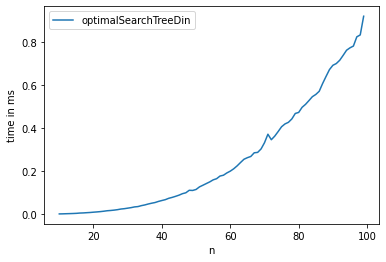

In [77]:
x=[]; y=[]

for n in range(10,100):

  keys, p, q = optimal_bst_instance_generator(n)

  t = repeat(setup="from __main__ import optimalSearchTreeDin", stmt=f"optimalSearchTreeDin({keys}, {p}, {n})", repeat=1, number=20)

  x.append(n)
  y.append(t)

plt.plot(x,y)
plt.legend(["optimalSearchTreeDin"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

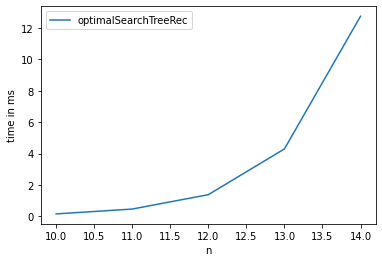

In [78]:
z=[]; w=[]

for n in range(10,15):

  keys, p, q = optimal_bst_instance_generator(n)

  t2 = repeat(setup="from __main__ import optimalSearchTreeRec", stmt=f"optimalSearchTreeRec({keys}, {p}, {0}, {n-1})", repeat=1, number=20)

  z.append(n)
  w.append(t2)

plt.plot(z,w)
plt.legend(["optimalSearchTreeRec"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

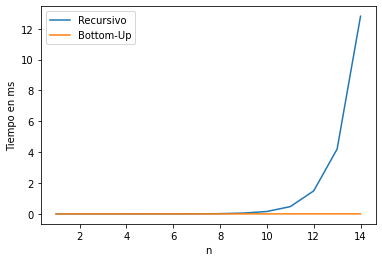

In [79]:
x=[]
y_din = []
y_rec = []

for n in range(1,15):
  keys, freq, q = optimal_bst_instance_generator(n)
  cont = 0
  cont2 = 0
  t_din = repeat(setup="from __main__ import optimalSearchTreeDin", stmt=f"optimalSearchTreeDin({keys}, {p}, {n})", repeat=1, number=20)
  t_rec = repeat(setup="from __main__ import optimalSearchTreeRec", stmt=f"optimalSearchTreeRec({keys}, {p}, {0}, {n-1})", repeat=1, number=20)

  x.append(n)
  y_din.append(t_din)
  y_rec.append(t_rec)

plt.plot(x,y_rec)
plt.plot(x,y_din)
plt.legend(["Recursivo","Bottom-Up"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()



### Análisis de resultados

Podemos apreciar en los previos gráficos que la versión dinámica de nuestro algoritmo es dramáticamente más rápida que la implementación recursiva, ya que la dinámica posee una complejidad temporal $O(n^3)$, mientras que la recursiva tiene una complejidad exponencial en $n$. podemos ver la enorme diferencia de velocidad en la escala de los gráficos, el del dinámico demora alrededor de 0.8ms en procesar un arreglo de tamaño 100, mientras que el recursivo demora mas de 10 veces eso (12ms) en resolver un arreglo de solo 15 elementos.